# <center>3) Modelo<center>
### <center>Uc Kantun Orlando de Jesus, Cortés Montes Enrique Eduardo <center>
#### <center>Stock Movement Prediction from Tweets and Historical Prices<center>

Lo que se va a realizar son comparaciones de diferentes modelos, en especial el del paper.

In [1]:
# Importando las librerías
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Cargando la tabla final (resultado.csv)
resultado=pd.read_csv("/content/gdrive/MyDrive/Proyecto_CD2/resultado.csv")

In [4]:
# Tomando sólamente las columnas de interés
resultado=resultado[['Company', 'Date', 'Text', 'y']]

In [5]:
# Poniendo de forma ascendente las fechas
resultado=resultado.sort_values(by="Date",ascending=True)
resultado.head()

,Company,Date,Text,y
64867,UNH,2014-01-02,"['$', 'unh', ""stock's"", 'trend', 'analysis', '...",0
82441,AAPL,2014-01-02,"['AT_USER', '$', 'aapl', 'having', 'breathing'...",0
82442,AAPL,2014-01-02,"['emylers', ':', ""cheeky's"", 'board', '!', ':'...",0
40607,GOOG,2014-01-02,"['trade', 'signals', 'generated', 'from', 'the...",0
40608,GOOG,2014-01-02,"['$', 'goog', '-', 'apple', 'can', 'unlock', '...",0


In [6]:
# Tomando los datos 
X=resultado.iloc[:,:3] # Las primeras 3 columnas
y=resultado.iloc[:,-1] # La última columna  , es decir, el target

In [7]:
# Separando las palabras de nuestros tweets
from shlex import split
m=X["Text"].shape[0]
data=[]
for i in range(m):
  h= X["Text"][i]
  data.append(h.split())

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Contruir tokenizador y vocabulario
n_words = 200
maxlen=150 #se corta despues de las 150 palabras
#Tok train
tokenizer = Tokenizer(num_words=n_words) # el Tokenizador solo tomará las 'n_words' palabras más frecuentes 
tokenizer.fit_on_texts(data)
sequences_tr=tokenizer.texts_to_sequences(data)


In [9]:
# Calculando la longitud del mayor tweet
numbers=[]
for i in range(X["Text"].shape[0]):
  numbers.append(len(data[i]))

max_length=max(numbers)
max_length

104

In [11]:
# Haciendo el token y viendo el número de palabras del vocabulario
tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_counts = tokenizer.word_counts

Found 59838 unique tokens.


In [12]:
# Función que nos muestra las palabras más frecuentes
import matplotlib.pyplot as plt
A=list(set(word_index.keys()))
def frecuencia(a,b,A):
  count=0
  lista=[]
  for i in range(a,b):
    lista.append([word_counts[A[i]],A[i]])
  
  lista.sort(reverse=True)

  for i in range(5):
    plt.scatter(lista[i][1],lista[i][0])
  plt.show()

  return lista[0:20]

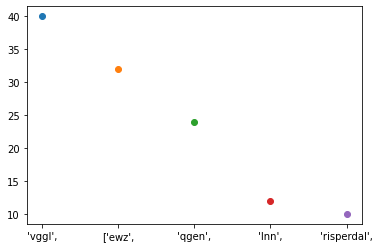

[[40, "'vggl',"],
 [32, "['ewz',"],
 [24, "'qgen',"],
 [12, "'lnn',"],
 [10, "'risperdal',"],
 [10, "'102.00',"],
 [4, "'substantially',"],
 [4, "'inician',"],
 [4, "'defeats',"],
 [4, "'5033.56',"],
 [2, "['geography',"],
 [2, "'istribution',"],
 [2, "'ee.uu',"],
 [2, "'avocados',"],
 [2, "'anti-discrimination',"],
 [2, "'acmp',"],
 [2, "'8.98',"],
 [2, "'64.73',"],
 [2, "'14:18',"]]

In [13]:
# Visualiando las 20 palabras más frecuentes
frecuencia(1,20,A)

In [14]:
# Train y Test
# Tomando el 80% de train y 20% de test
num_tr=int(X["Text"].shape[0]*0.8)
num_te=int(X["Text"].shape[0]*0.2)
tr_txt, tr_y= X["Text"][:num_tr],y[:num_tr]
te_txt, te_y=X["Text"][:num_te],y[:num_te]

In [15]:
# Haciendo el token en nuestra conjunto
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Contruir tokenizador y vocabulario
n_words = 200
maxlen=100 #se corta despues de las 100 palabras
#Tok train
tokenizer = Tokenizer(num_words=n_words) # el Tokenizador solo tomará las 'n_words' palabras más frecuentes 
tokenizer.fit_on_texts(tr_txt)
sequences_tr=tokenizer.texts_to_sequences(tr_txt)

#Tok test
tokenizer.fit_on_texts(te_txt)
sequences_te=tokenizer.texts_to_sequences(te_txt)

data_tr=pad_sequences(sequences_tr,maxlen=maxlen)
data_te=pad_sequences(sequences_te,maxlen=maxlen)

labels_tr=np.asarray(tr_y)
labels_te=np.asarray(te_y)

x_train=data_tr
y_train=labels_tr

x_test=data_te
y_test=labels_te

# word_index contiene un diccionario con el vocabulario y sus indices en orden ascendente de acuerdo a su frecuencia
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_counts = tokenizer.word_counts

Found 41598 unique tokens.


In [16]:
# Cargando librerías para los modelos
from sklearn import datasets
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Modelo 1 (SVM)

In [32]:

# Realizando pruebas con el modelo SVM
svm_clf=Pipeline([
                  ("scaler",StandardScaler()),
                  ("linear_svc",LinearSVC(C=1,loss="hinge")),
])

svm_clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

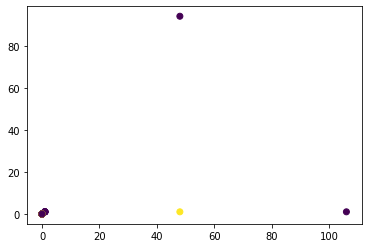

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
plt.show()

## SCORE del Modelo 1

In [36]:
# El score del modelo svm
svm_clf.score(x_test,y_test)

0.5180499129425421

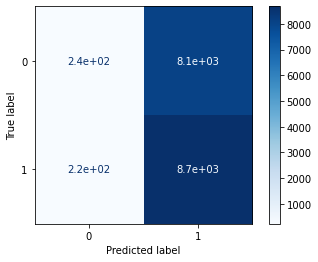

In [38]:
# Los matriz de confusion
from sklearn.metrics import plot_confusion_matrix
#class_names = y_test.target_names
plot_confusion_matrix(svm_clf, x_test, y_test,
                                 cmap=plt.cm.Blues)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

## Modelo 2

In [27]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding
max_features = 20000 
#maxlen=20000
model=Sequential()
model.add(Embedding(max_features,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 8)            160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 801       
Total params: 160,801
Trainable params: 160,801
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)

Epoch 1/10
1723/1723 [==============================] - 6s 3ms/step - loss: 0.6507 - acc: 0.5943 - val_loss: 0.7373 - val_acc: 0.4880
Epoch 2/10
1723/1723 [==============================] - 6s 3ms/step - loss: 0.6495 - acc: 0.5972 - val_loss: 0.7424 - val_acc: 0.4891
Epoch 3/10
1723/1723 [==============================] - 6s 3ms/step - loss: 0.6489 - acc: 0.5989 - val_loss: 0.7450 - val_acc: 0.4904
Epoch 4/10
1723/1723 [==============================] - 6s 3ms/step - loss: 0.6482 - acc: 0.5990 - val_loss: 0.7487 - val_acc: 0.4916
Epoch 5/10
1723/1723 [==============================] - 6s 3ms/step - loss: 0.6477 - acc: 0.6011 - val_loss: 0.7538 - val_acc: 0.4853
Epoch 6/10
1723/1723 [==============================] - 6s 3ms/step - loss: 0.6474 - acc: 0.5998 - val_loss: 0.7559 - val_acc: 0.4877
Epoch 7/10
1723/1723 [==============================] - 6s 3ms/step - loss: 0.6471 - acc: 0.6013 - val_loss: 0.7593 - val_acc: 0.4916
Epoch 8/10
1723/1723 [==============================] - 6s 3ms

### Accyracy (mean) Modelo 2

In [35]:
sum(history.history['acc'])/len(history.history['acc'])

0.5998476505279541

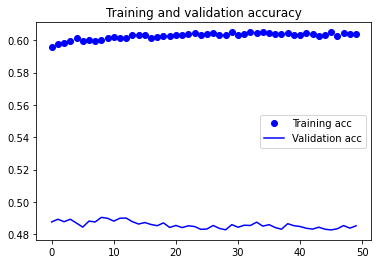

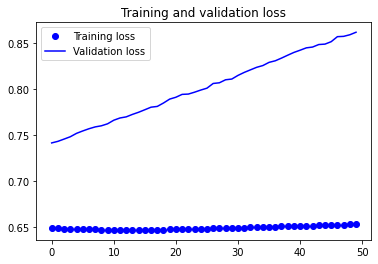

In [43]:
#Gráficas
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Modelo 3 (LSTM 1)

In [36]:
from keras.layers import LSTM

max_features = 20000
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
431/431 [==============================] - 5s 12ms/step - loss: 0.6858 - acc: 0.5298 - val_loss: 0.6964 - val_acc: 0.4880
Epoch 2/10
431/431 [==============================] - 5s 11ms/step - loss: 0.6806 - acc: 0.5407 - val_loss: 0.6993 - val_acc: 0.4874
Epoch 3/10
431/431 [==============================] - 5s 11ms/step - loss: 0.6775 - acc: 0.5468 - val_loss: 0.7020 - val_acc: 0.4869
Epoch 4/10
431/431 [==============================] - 5s 11ms/step - loss: 0.6746 - acc: 0.5495 - val_loss: 0.6993 - val_acc: 0.4894
Epoch 5/10
431/431 [==============================] - 5s 11ms/step - loss: 0.6715 - acc: 0.5578 - val_loss: 0.7046 - val_acc: 0.4892
Epoch 6/10
431/431 [==============================] - 5s 11ms/step - loss: 0.6689 - acc: 0.5585 - val_loss: 0.7015 - val_acc: 0.4921
Epoch 7/10
431/431 [==============================] - 5s 11ms/step - loss: 0.6664 - acc: 0.5608 - val_loss: 0.7092 - val_acc: 0.4839
Epoch 8/10
431/431 [==============================] - 5s 12ms/step - 

### Accuracy Modelo 3 (LSTM 1)

In [37]:
sum(history.history['acc'])/len(history.history['acc'])

0.5541678667068481

## Modelo 4 (GRU con una capa)

In [39]:
#funcion para cargar el archivo con los embeddings
vocab_size=59838 
from numpy import asarray
from numpy import zeros
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding

#se crea una matriz de pesos a partir de los embeddings
def get_weight_matrix(embedding, vocab):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(vocab) + 1
	# define weight matrix dimensions with all 0
	weight_matrix = zeros((vocab_size, 100))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in vocab.items():
		vector = embedding.get(word)
		if vector is not None:
			weight_matrix[i] = vector
	return weight_matrix

In [40]:
#se carga el archivo con los embeddings
raw_embedding = load_embedding('/content/gdrive/MyDrive/Proyecto_CD2/glove.twitter.27B.100d.txt')
#se obtienen los vectores
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
#se crea la capa de embeddings
embedding_layer = Embedding(41599, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [41]:
#cargando capas
from keras.layers import LSTM
from keras.layers import GRU

In [43]:
#modelo GRU 1
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(GRU(128,return_sequences=True))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid')) #capa de salida
print(model_lstm.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          640000    
_________________________________________________________________
gru_12 (GRU)                 (None, None, 128)         62208     
_________________________________________________________________
dense_8 (Dense)              (None, None, 10)          1290      
_________________________________________________________________
dense_9 (Dense)              (None, None, 1)           11        
Total params: 703,509
Trainable params: 703,509
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
#se compila el modelo lstm
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #cambiar a categorica
history_lstm = model_lstm.fit(x_train, y_train,  epochs=10, 
                    validation_data=[x_test, y_test],
                    batch_size=128,
                    validation_split=0.2) 

Epoch 1/10
431/431 [==============================] - 8s 19ms/step - loss: 0.6880 - accuracy: 0.5269 - val_loss: 0.6950 - val_accuracy: 0.4983
Epoch 2/10
431/431 [==============================] - 8s 17ms/step - loss: 0.6872 - accuracy: 0.5281 - val_loss: 0.6956 - val_accuracy: 0.4981
Epoch 3/10
431/431 [==============================] - 7s 17ms/step - loss: 0.6866 - accuracy: 0.5288 - val_loss: 0.6964 - val_accuracy: 0.4976
Epoch 4/10
431/431 [==============================] - 7s 17ms/step - loss: 0.6862 - accuracy: 0.5292 - val_loss: 0.6950 - val_accuracy: 0.4974
Epoch 5/10
431/431 [==============================] - 7s 17ms/step - loss: 0.6860 - accuracy: 0.5297 - val_loss: 0.6960 - val_accuracy: 0.4977
Epoch 6/10
431/431 [==============================] - 7s 17ms/step - loss: 0.6856 - accuracy: 0.5303 - val_loss: 0.6964 - val_accuracy: 0.4975
Epoch 7/10
431/431 [==============================] - 7s 17ms/step - loss: 0.6853 - accuracy: 0.5304 - val_loss: 0.6971 - val_accuracy: 0.4973

### Accuracy Modelo 4 (GRU 1)

In [46]:
sum(history.history['acc'])/len(history.history['acc'])

0.5541678667068481

## Modelo 5 (GRU paper)

In [25]:
#modelo GRU
from keras.layers import Dropout
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(GRU(128,return_sequences=True))
model_lstm.add(GRU(128,return_sequences=True))
model_lstm.add(GRU(128,return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid')) #capa de salida
print(model_lstm.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
gru_9 (GRU)                  (None, None, 128)         62208     
_________________________________________________________________
gru_10 (GRU)                 (None, None, 128)         99072     
_________________________________________________________________
gru_11 (GRU)                 (None, None, 128)         99072     
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           129       
Total params: 900,481
Trainable params: 900,481
Non-trainable params: 0
________________________________________________

In [47]:
#se compila el modelo lstm
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #cambiar a categorica
history_lstm = model_lstm.fit(x_train, y_train,  epochs=50, 
                    validation_data=[x_test, y_test],
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
431/431 [==============================] - 8s 18ms/step - loss: 0.6841 - accuracy: 0.5317 - val_loss: 0.6994 - val_accuracy: 0.4971
Epoch 2/50
431/431 [==============================] - 7s 17ms/step - loss: 0.6839 - accuracy: 0.5321 - val_loss: 0.6997 - val_accuracy: 0.4968
Epoch 3/50
431/431 [==============================] - 7s 17ms/step - loss: 0.6837 - accuracy: 0.5323 - val_loss: 0.6994 - val_accuracy: 0.4972
Epoch 4/50
431/431 [==============================] - 7s 17ms/step - loss: 0.6835 - accuracy: 0.5326 - val_loss: 0.7006 - val_accuracy: 0.4967
Epoch 5/50
431/431 [==============================] - 7s 17ms/step - loss: 0.6833 - accuracy: 0.5328 - val_loss: 0.7010 - val_accuracy: 0.4975
Epoch 6/50
431/431 [==============================] - 7s 17ms/step - loss: 0.6830 - accuracy: 0.5333 - val_loss: 0.7000 - val_accuracy: 0.4964
Epoch 7/50
431/431 [==============================] - 7s 17ms/step - loss: 0.6829 - accuracy: 0.5335 - val_loss: 0.7053 - val_accuracy: 0.4981

### Accuracy Modelo 5 (GRU paper)

In [48]:
sum(history.history['acc'])/len(history.history['acc'])

0.5541678667068481